In [1]:
# Basic libraries
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

from sklearn.model_selection import train_test_split
import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 15,12
LABELS = ['Normal', 'Fraud']

In [2]:
# import the data set
# data = pd.read_csv('CreditCard.csv')
data = pd.read_csv('CreditCard.csv', sep=',') 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# data.isnull().sum()
# data.info()
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# # import the dataset

# data.head()

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# data.Class.value_counts()

In [8]:
284315+492

284807

In [9]:
492/284807

0.001727485630620034

In [10]:
# !pip install pandas-profiling

from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file = 'output.html')

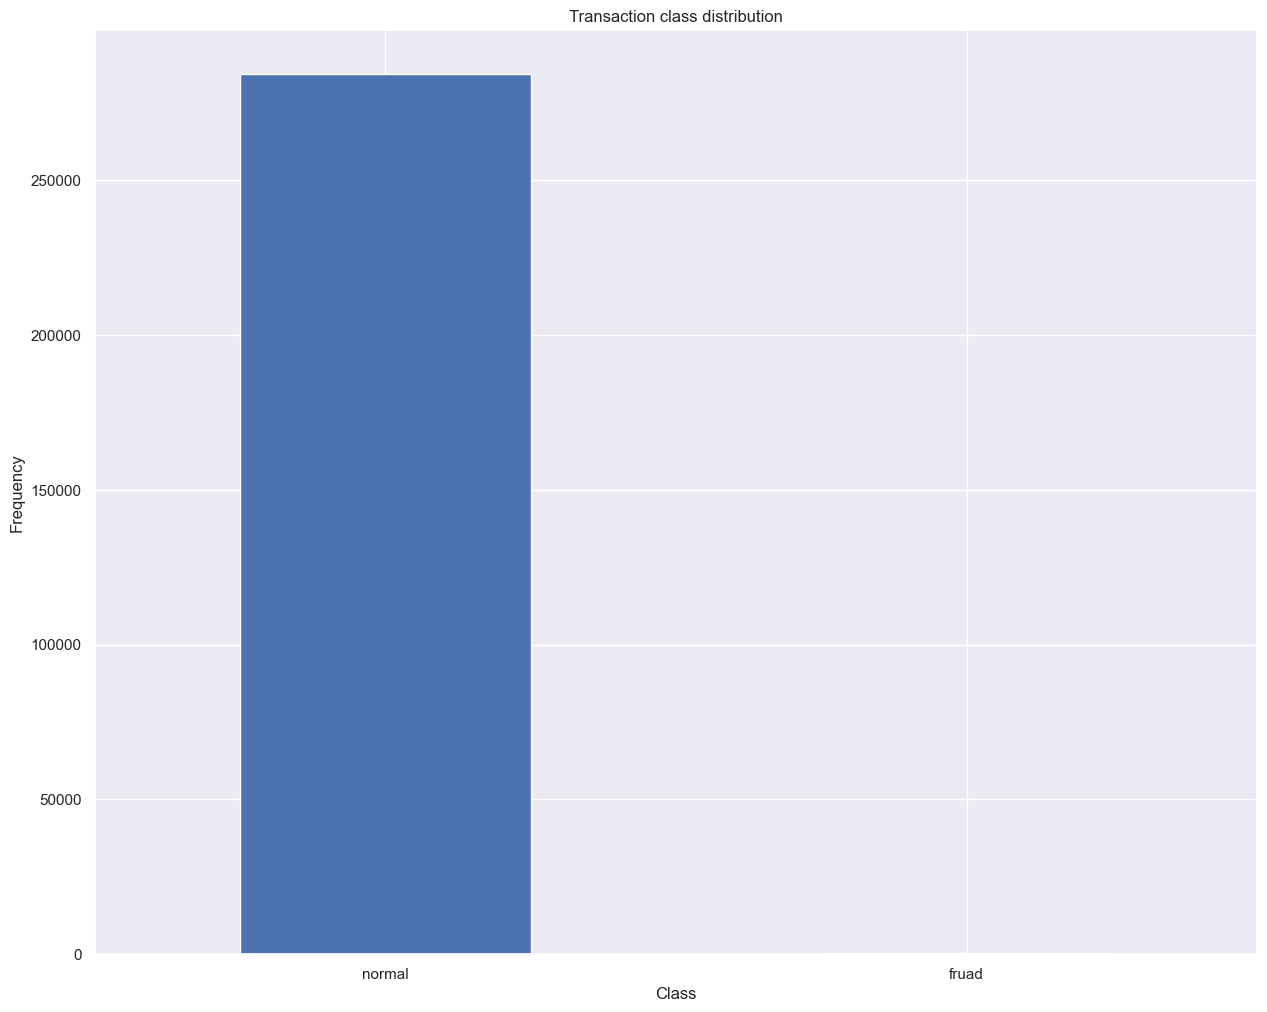

In [11]:
# count_classes = pd.value_counts(data['Class'], sort=True)
# count_classes.plot(kind='bar', rot=0)
# plt.title("Transaction class distribution")
# plt.xticks(range(2),LABELS)
# plt.xlabel('Class')
# plt.ylabel("Frequency")
# plt.show()
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2),['normal','fruad' ])
plt.xlabel('Class')
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'frequency')

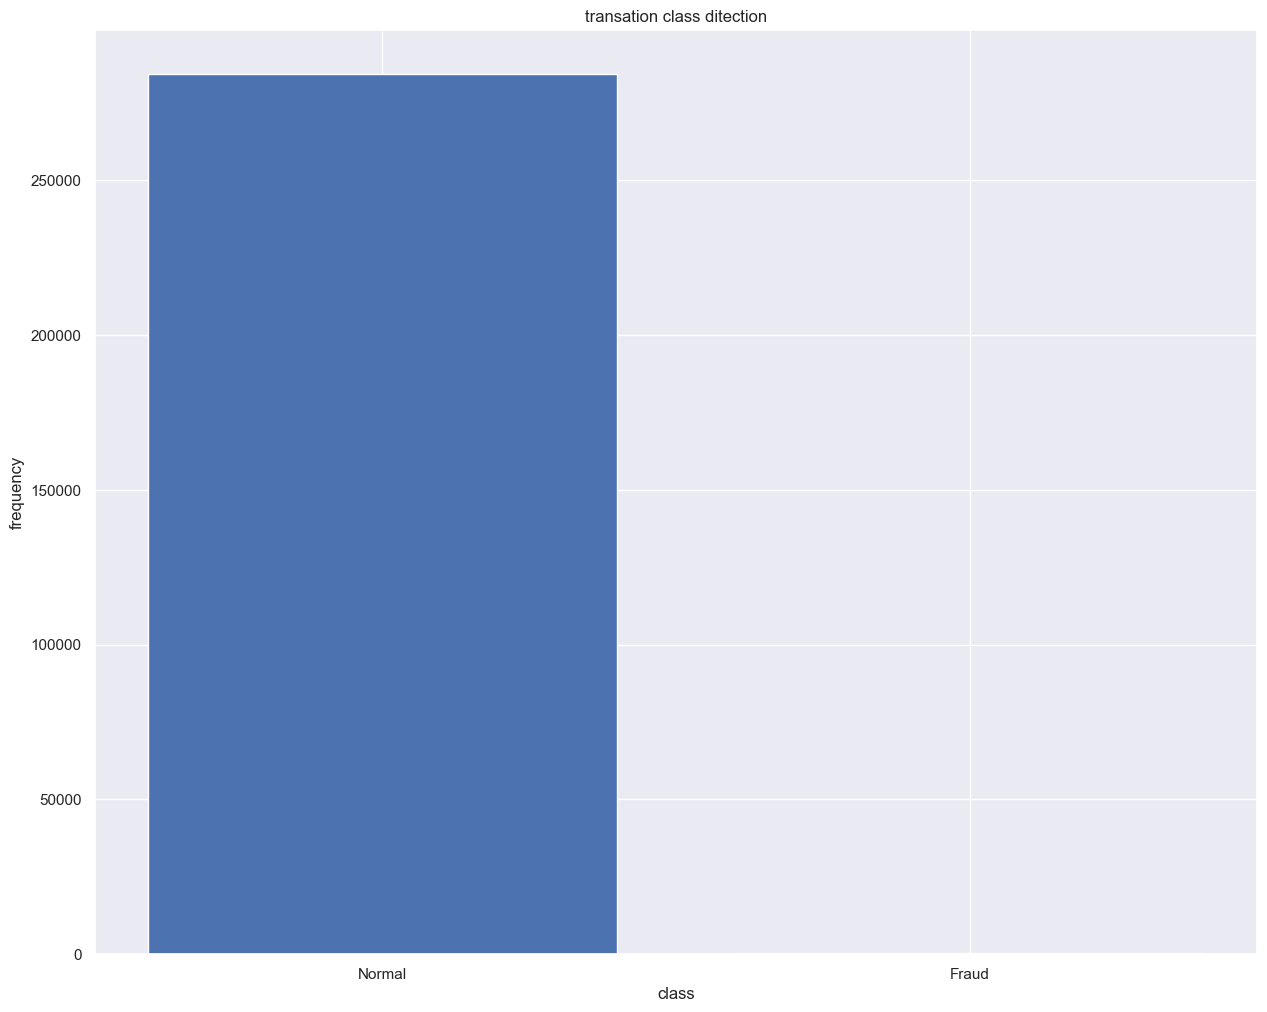

In [12]:
count_data = data['Class'].value_counts()
# count_data
plt.bar(LABELS,count_data)
plt.title('transation class ditection')
plt.xlabel('class')
plt.ylabel('frequency')

In [13]:
# fraud = data[data['Class']==1]
# normal = data[data['Class']==0]
# print(fraud.shape, normal.shape)

In [14]:
fraud =data[data.Class ==1] #just want to see my related
normal = data[data.Class ==0]
fraud.shape

(492, 31)

In [15]:
492/(492+284315)

0.001727485630620034

In [16]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'normal transation')

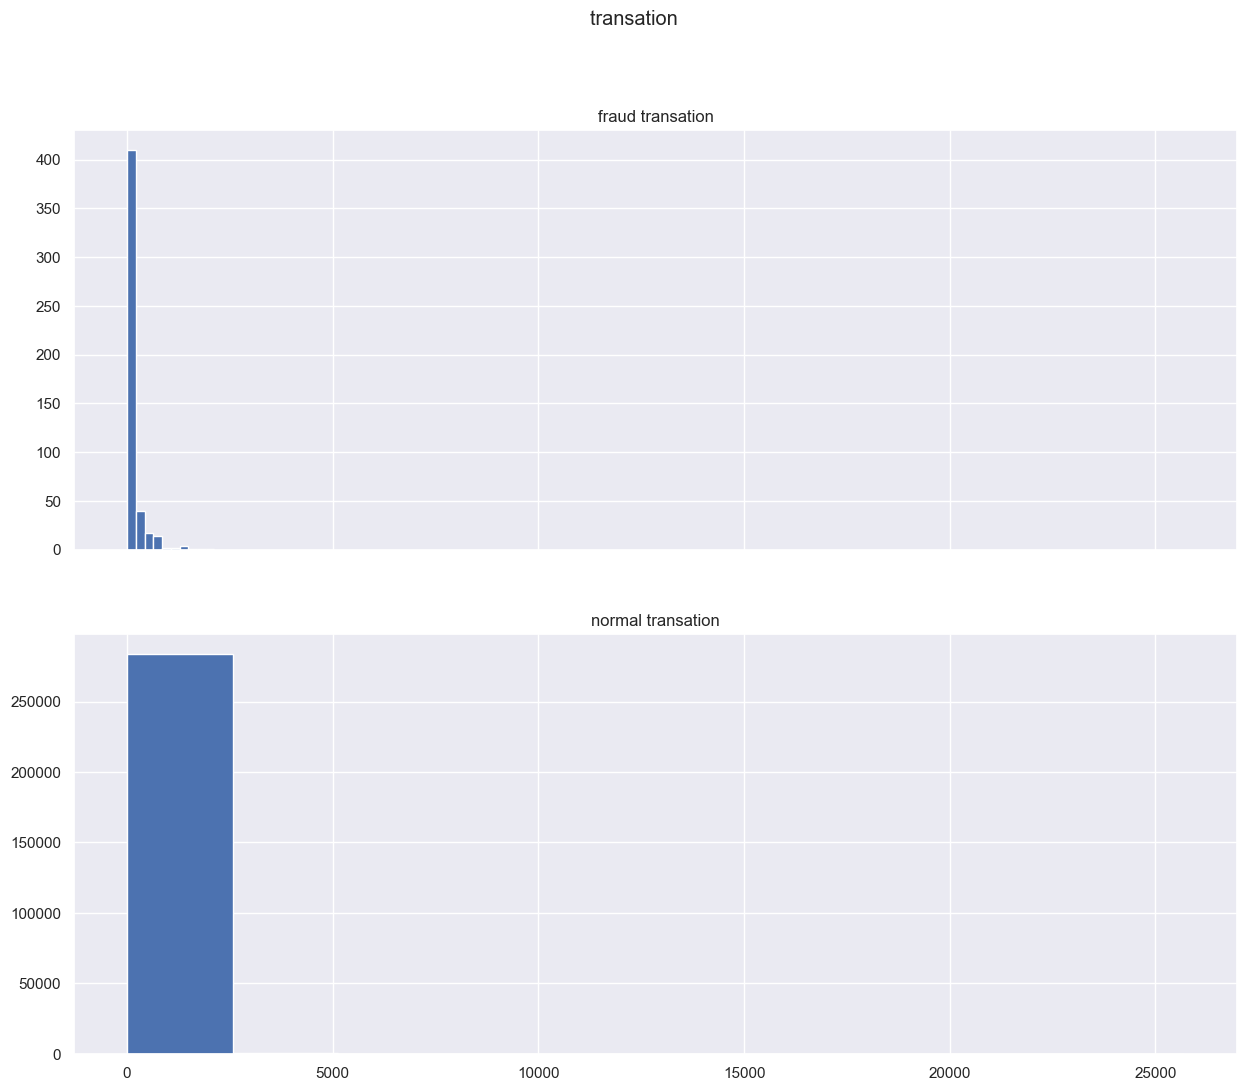

In [19]:
f,( ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('transation ')
ax1.hist(fraud.Amount)
ax1.set_title('fraud transation')
ax2.hist(normal.Amount)
ax2.set_title('normal transation')

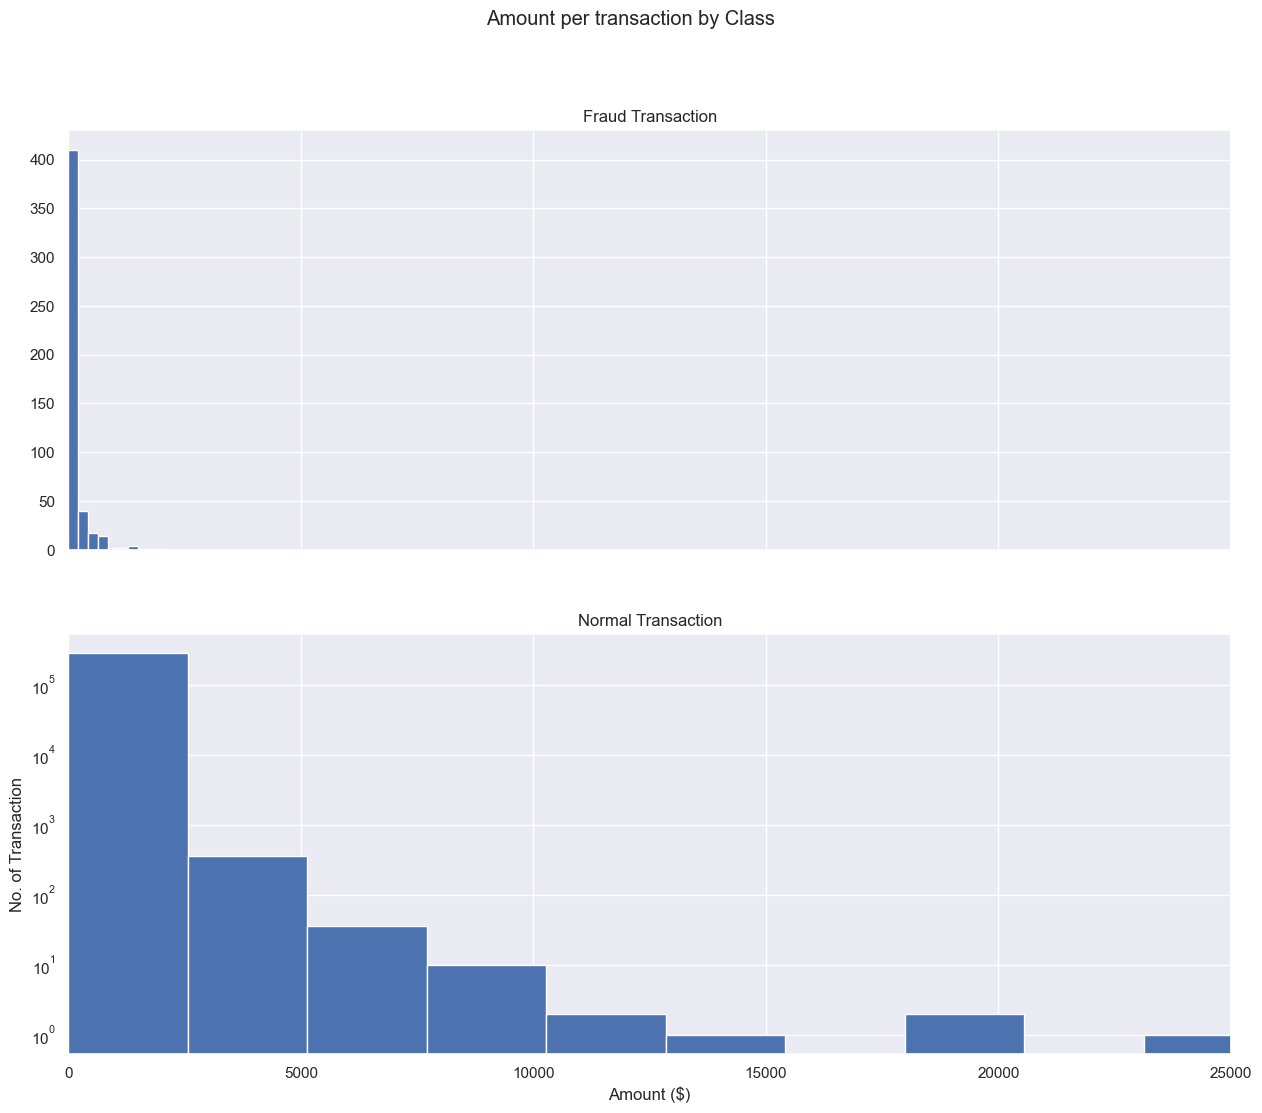

In [20]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amount per transaction by Class")
# bins = 50
ax1.hist(fraud.Amount)
ax1.set_title('Fraud Transaction')


ax2.hist(normal.Amount)
ax2.set_title('Normal Transaction')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

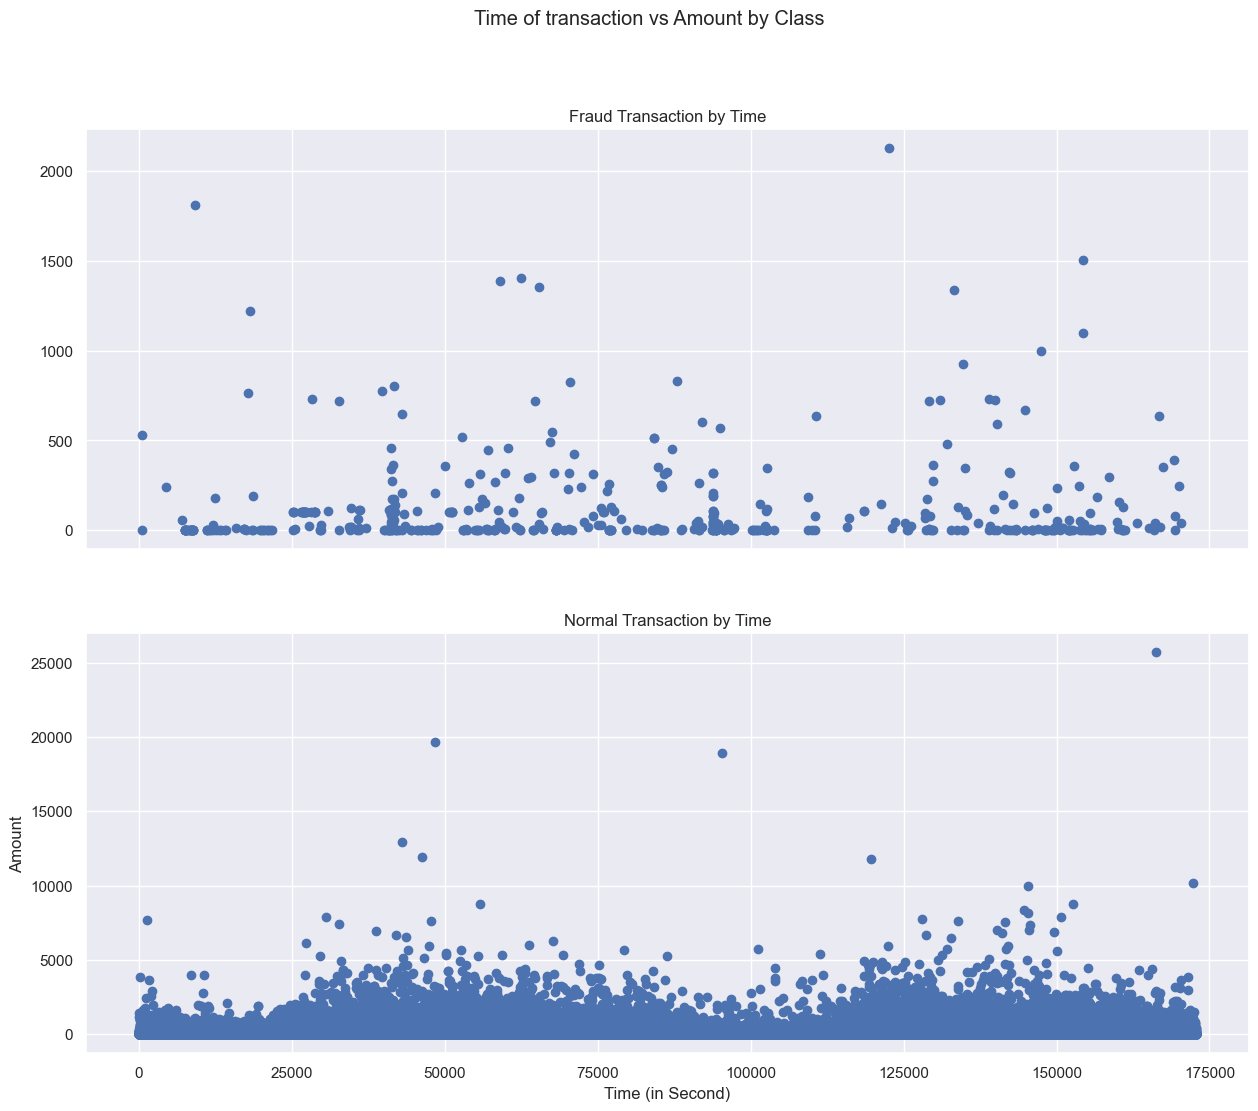

In [22]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud Transaction by Time')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal Transaction by Time')

plt.xlabel("Time (in Second)")
plt.ylabel("Amount")

plt.show()

In [23]:
data.shape

(284807, 31)

In [24]:
# we are taking 10% data only for building a model
# Please try to replicate the same with all data - Task

In [25]:
data1 = data.sample(frac=0.2, random_state=1000)
data1.shape

(56961, 31)

In [26]:
fraud = data1[data1['Class']==1]
valid = data1[data1['Class']==0]

print(fraud.shape)
print(valid.shape)

(106, 31)
(56855, 31)


In [27]:
outlier_fraction = 106/(106+56858)

In [28]:
outlier_fraction

0.0018608243803103714

In [29]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
198800,132658.0,2.056433,-0.316915,-2.789687,-0.775164,2.497163,3.164444,-0.396550,0.715194,0.448127,...,0.243647,0.743975,0.037861,0.737525,0.302948,-0.087858,-0.001144,-0.064954,3.80,0
95536,65359.0,-0.476480,0.967301,1.660071,0.000008,-0.106866,-0.624360,0.599600,0.085344,-0.329163,...,-0.186026,-0.470205,0.055860,0.364065,-0.331242,0.082720,0.278155,0.119504,3.57,0
180242,124448.0,1.943666,-1.029557,-1.276665,-0.427737,-0.815657,-1.007531,-0.293930,-0.238641,-0.743251,...,-0.027971,0.203359,0.049295,0.092062,-0.178437,0.762153,-0.089487,-0.057625,107.77,0
278892,168508.0,-0.343991,1.475547,0.349266,1.211181,-0.510325,-1.281538,0.455647,0.011873,-0.737317,...,0.463618,1.563284,-0.107122,1.032006,-0.465200,0.211401,0.238458,0.208167,7.84,0
85098,60601.0,1.185368,0.248102,1.110961,2.448941,-0.387718,0.503952,-0.546283,0.203680,0.070122,...,-0.102446,-0.226039,-0.052715,-0.481575,0.368006,0.004532,0.033685,0.027790,4.72,0


In [30]:
columns = data1.iloc[:,1:-1]
target = data1.iloc[:,-1]

In [31]:
columns.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
198800,2.056433,-0.316915,-2.789687,-0.775164,2.497163,3.164444,-0.396550,0.715194,0.448127,0.031925,...,-0.165740,0.243647,0.743975,0.037861,0.737525,0.302948,-0.087858,-0.001144,-0.064954,3.80
95536,-0.476480,0.967301,1.660071,0.000008,-0.106866,-0.624360,0.599600,0.085344,-0.329163,-0.339743,...,0.015199,-0.186026,-0.470205,0.055860,0.364065,-0.331242,0.082720,0.278155,0.119504,3.57
180242,1.943666,-1.029557,-1.276665,-0.427737,-0.815657,-1.007531,-0.293930,-0.238641,-0.743251,1.125115,...,-0.449719,-0.027971,0.203359,0.049295,0.092062,-0.178437,0.762153,-0.089487,-0.057625,107.77
278892,-0.343991,1.475547,0.349266,1.211181,-0.510325,-1.281538,0.455647,0.011873,-0.737317,0.100004,...,0.248074,0.463618,1.563284,-0.107122,1.032006,-0.465200,0.211401,0.238458,0.208167,7.84
85098,1.185368,0.248102,1.110961,2.448941,-0.387718,0.503952,-0.546283,0.203680,0.070122,0.556493,...,-0.141848,-0.102446,-0.226039,-0.052715,-0.481575,0.368006,0.004532,0.033685,0.027790,4.72


In [32]:
target.head()

198800    0
95536     0
180242    0
278892    0
85098     0
Name: Class, dtype: int64

# split the data into training and test

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(columns, target, 
                                                    train_size=0.75,random_state=125,
                                                   stratify=target)


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(columns,target,train_size=.75, random_state = 125)


In [35]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


# Using Machine Learning model

# Ensemble Learning - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dtree,n_estimators=50,random_state=1)
bgcl.fit(x_train, y_train)

In [ ]:
y_pred_train_bg = bgcl.predict(x_train)
y_pred_test_bg = bgcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_bg))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_bg))

In [ ]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_bg))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_bg))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

In [ ]:
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_dt))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_dt))

# Ensemble Learning - AdaBoosting method

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(random_state=1)
adbcl.fit(x_train, y_train)

In [ ]:
y_pred_train_adb = adbcl.predict(x_train)
y_pred_test_adb = adbcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_adb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_adb))

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl.fit(x_train, y_train)

In [ ]:
y_pred_train_gd = gbcl.predict(x_train)
y_pred_test_gd = gbcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_gd))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_gd))

# XGBoost

In [ ]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(x_train, y_train)

In [ ]:
y_pred_train_xgb = xgbcl.predict(x_train)
y_pred_test_xgb = xgbcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_xgb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_xgb))

# IsolationForest, LocalOutlierFactor, OneClassSVM

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
Classification = {"Isolation Forest" : IsolationForest(max_samples=len(columns),
                                                     contamination=outlier_fraction),
                 
                 "Local Outlier Factor" : LocalOutlierFactor(contamination=outlier_fraction),
                 
                 "One Class SVM" : OneClassSVM()}

In [ ]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(columns)
        score_prediction = clf.negative_outlier_factor_
        
    elif clf_name =='One Class SVM' :
        clf.fit(columns)
        y_pred = clf.predict(columns)
        
    else:
        clf.fit(columns)
        score_prediction = clf.decision_function(columns)
        y_pred = clf.predict(columns)
        
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=target).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(target, y_pred))
    print("Classification Report :")
    print(classification_report(target, y_pred))